In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder

**MOUNTING THE DATA**

In [ ]:
# Mount data file from google drive to colab workspace

from google.colab import drive 
drive.mount('/content/drive')
path = '/content/drive/MyDrive/data-science-course-work/Data_shipping.xlsx'

Mounted at /content/drive


In [ ]:
# Load the Excel file into a Pandas DataFrame

df = pd.read_excel(path) 

**DATA EXPLORATION**

In [ ]:
# Inspect the first five rows of the dataset

print(df.head(5))

In [ ]:
# Check the shape of the data set

print("Shape of the DataFrame:", df.shape) 

In [ ]:
# Check the number for missing values

missing_values = df.isnull().sum() 
print (missing_values)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Discount_offered       0
Weight_in_gms          0
ROT_Y                  0
dtype: int64


In [ ]:
# Check the duplicate rows and remove the missing rows

duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

if duplicate_rows.sum() > 0:
  # Drop duplicate rows from the DataFrame
  df = df.drop_duplicates()

  # Check the shape of the DataFrame after dropping duplicates
  print("Shape of DataFrame after dropping duplicates:", df.shape)

Number of duplicate rows: 0


In [ ]:
# Check the data type

print(df.dtypes) 

In [ ]:
# Select the numerical columns to plot

num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Plot histograms for each numerical column
for col in num_cols:
    fig, ax = plt.subplots()
    ax.hist(df[col], bins=100)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.show()


In [ ]:
# Use a boxplot to show the distribution of the data

for col in num_cols:
    fig, ax = plt.subplots()
    ax.boxplot(df[col])
    ax.set_xlabel(col)

In [ ]:
# Describe the data

df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,ROT_Y
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**CLASS DISTRIBUTION**

In [ ]:
# Compute class distribution for Customer_care_calls

class_distribution = df['Customer_care_calls'].value_counts(normalize=True)
print(class_distribution)


4    0.323393
3    0.292481
5    0.211656
6    0.092099
2    0.058005
7    0.022366
Name: Customer_care_calls, dtype: float64


In [ ]:
# Compute class distribution for Customer_rating

class_distribution = df['Customer_rating'].value_counts(normalize=True)
print(class_distribution)


3    0.203564
1    0.203200
4    0.199018
5    0.197382
2    0.196836
Name: Customer_rating, dtype: float64


In [ ]:
# Compute class distribution for Cost_of_the_Product

class_distribution = df['Cost_of_the_Product'].value_counts(normalize=True)
print(class_distribution)

245    0.010001
257    0.009910
260    0.009637
254    0.009183
264    0.009092
         ...   
107    0.000455
99     0.000455
120    0.000455
96     0.000455
122    0.000364
Name: Cost_of_the_Product, Length: 215, dtype: float64


In [ ]:
# Compute class distribution for Prior_purchases

class_distribution = df['Prior_purchases'].value_counts(normalize=True)
print(class_distribution)

3     0.359578
2     0.236294
4     0.195927
5     0.117011
6     0.051005
10    0.016183
7     0.012365
8     0.011637
Name: Prior_purchases, dtype: float64


In [ ]:
# Compute class distribution for Discount_offered

class_distribution = df['Discount_offered'].value_counts(normalize=True)
print(class_distribution)

10    0.078189
2     0.078007
6     0.077189
9     0.076825
3     0.076371
        ...   
65    0.003273
26    0.003273
42    0.003182
25    0.003091
30    0.003091
Name: Discount_offered, Length: 65, dtype: float64


In [ ]:
# Compute class distribution for Weight_in_gms

class_distribution = df['Weight_in_gms'].value_counts(normalize=True)
print(class_distribution)

4883    0.001091
1145    0.000909
5783    0.000909
4741    0.000909
5672    0.000909
          ...   
1425    0.000091
3811    0.000091
1609    0.000091
2178    0.000091
1098    0.000091
Name: Weight_in_gms, Length: 4034, dtype: float64


**SCATTER PLOTS**

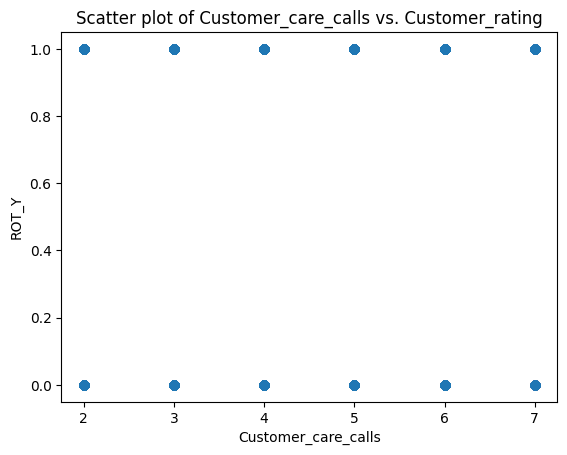

In [ ]:
# Scatter plot of Customer_care_calls and ROT_Y

plt.scatter(df['Customer_care_calls'], df['ROT_Y'])
plt.xlabel('Customer_care_calls')
plt.ylabel('ROT_Y')
plt.title('Scatter plot of Customer_care_calls vs. ROT_Y')
plt.show()


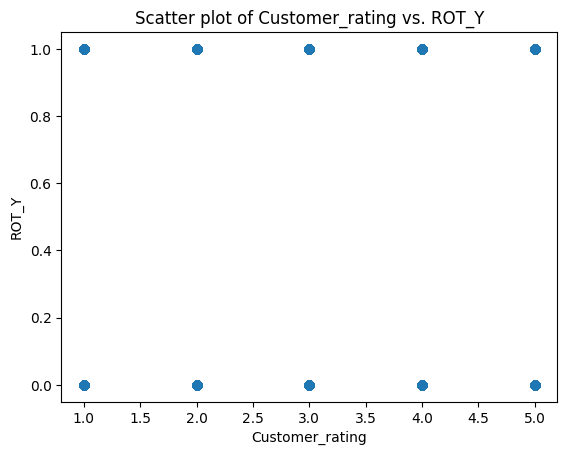

In [ ]:
# Scatter plot of Customer_rating and ROT_Y

plt.scatter(df['Customer_rating'], df['ROT_Y'])
plt.xlabel('Customer_rating')
plt.ylabel('ROT_Y')
plt.title('Scatter plot of Customer_rating vs. ROT_Y')
plt.show()

In [ ]:
# Scatter plot of Cost_of_the_Product and ROT_Y

plt.scatter(df['Cost_of_the_Product'], df['ROT_Y'])
plt.xlabel('Cost_of_the_Product')
plt.ylabel('ROT_Y')
plt.title('Scatter plot of Cost_of_the_Product vs. ROT_Y')
plt.show()

NameError: ignored

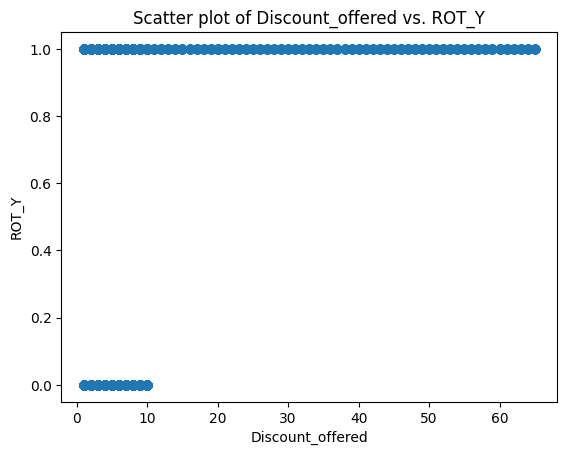

In [ ]:
# Scatter plot of Discount_offered and ROT_Y

plt.scatter(df['Discount_offered'], df['ROT_Y'])
plt.xlabel('Discount_offered')
plt.ylabel('ROT_Y')
plt.title('Scatter plot of Discount_offered vs. ROT_Y')
plt.show()

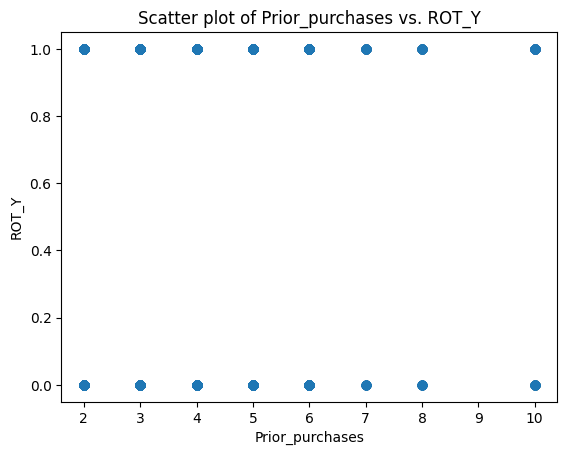

In [ ]:
# Scatter plot of Prior_purchases and ROT_Y

plt.scatter(df['Prior_purchases'], df['ROT_Y'])
plt.xlabel('Prior_purchases')
plt.ylabel('ROT_Y')
plt.title('Scatter plot of Prior_purchases vs. ROT_Y')
plt.show()

In [ ]:
# Scatter plot of Weight_in_gms and ROT_Y

plt.scatter(df['Weight_in_gms'], df['ROT_Y'])
plt.xlabel('Weight_in_gms')
plt.ylabel('ROT_Y')
plt.title('Scatter plot of Weight_in_gms vs. ROT_Y')
plt.show()

**BOX PLOT**

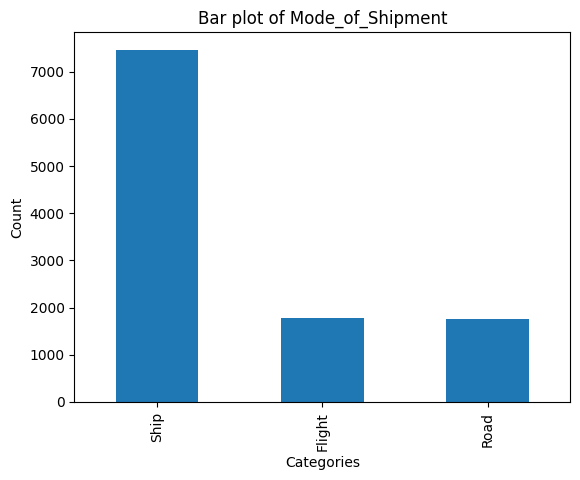

In [ ]:
# Bar plot of Mode_of_Shipment
df['Mode_of_Shipment'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar plot of Mode_of_Shipment')
plt.show()

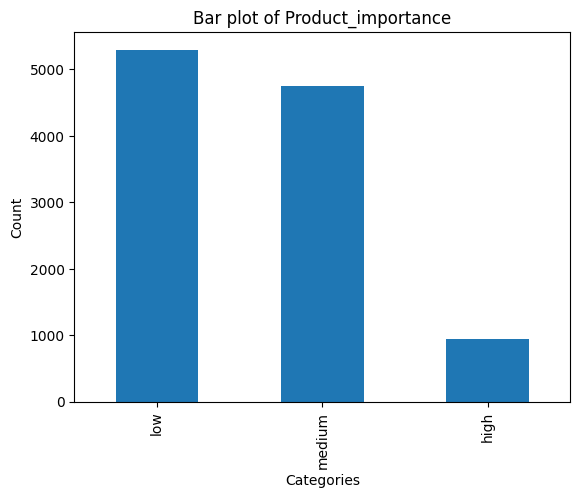

In [ ]:
# Bar plot of Product_importance
df['Product_importance'].value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar plot of Product_importance')
plt.show()

**ENCODING**

In [ ]:
# Identify the categorical columns to encode
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Weight_in_gms']

# Create an instance of the ordinal encoder
oe = OrdinalEncoder()

# Fit the encoder on the categorical columns
oe.fit(df[cat_cols])

# Transform the categorical columns to ordinal encoding
df[cat_cols] = oe.transform(df[cat_cols])

# Print the encoded DataFrame
print(df.head(20))

**SPLIT DATA**

In [ ]:
X = df.drop('ROT_Y', axis=1)
y = df['ROT_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8799, 10)
Shape of y_train: (8799,)
Shape of X_test: (2200, 10)
Shape of y_test: (2200,)


**DECISION TREE MODEL**

In [ ]:
# Create a decision tree classifier with max_depth=6
dt_classifier = DecisionTreeClassifier(max_depth=6)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.68
Precision: 0.8418657565415245
Recall: 0.5670498084291188
F1 score: 0.6776556776556777


In [ ]:
# Instantiate the logistic regression model
model = LogisticRegression(C=0.1)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6595454545454545
Precision: 0.7249190938511327
Recall: 0.6865900383141762
F1 score: 0.7052341597796142


In [ ]:
# Instantiate the Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6895454545454546
Precision: 0.9755351681957186
Recall: 0.4888888888888889
F1 score: 0.6513527309851965


In [ ]:
# Instantiate the KNN model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6554545454545454
Precision: 0.7221770917952883
Recall: 0.6812260536398468
F1 score: 0.7011041009463723


In [ ]:
# Create an instance of SVC
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6904545454545454
Precision: 0.9727272727272728
Recall: 0.49195402298850577
F1 score: 0.6534351145038167
